# Lorenz 63 model

The model below is taken from the [paper](https://link.springer.com/content/pdf/10.1007/s11222-019-09884-y.pdf), Section 5.3 with simplifications.

([], [])

<Figure size 1080x360 with 0 Axes>

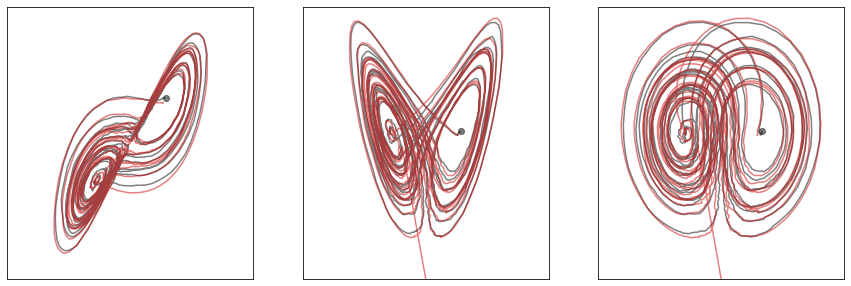

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Define the parameters of Lorenz 63
r = 28
b = 8/3
s = 10

# define the stochastic one step-ahead function with step size gam
def Lorenz63(x, r, s, b, gam):
    x1 = x[0] - gam * s * (x[0] - x[1]) + np.sqrt(gam) * np.random.normal(0, 1)
    x2 = x[1] + gam * (r * x[0] - x[1] - x[0] * x[2]) + np.sqrt(gam) * np.random.normal(0, 1)
    x3 = x[2] + gam * (x[0] * x[1] - b * x[2]) + np.sqrt(gam) * np.random.normal(0, 1)

    return np.array([x1, x2, x3])


gam = 0.01
T = 2000
ts = 10

x = np.zeros((3, T))
y = np.zeros(T)

x[:, 0] = np.array([-5.91652, -5.52332, 24.5723]).T
H = np.array([1, 0, 0])

sig_y = 1
y[0] = H @ x[:, 0] + sig_y * np.random.normal(0, 1)
n = 0

for t in range(1, T):
    x[:, t] = Lorenz63(x[:, t-1], r, s, b, gam)
    y[t] = H @ x[:, t] + sig_y * np.random.normal(0, 1)


N = 1000
x_particles = np.zeros((3, N))
x_particles_pred = np.zeros((3, N))
w = np.ones(N) / N
x_particles = np.random.multivariate_normal(x[:, 0], np.eye(3), N).T
x_est = np.zeros((3, T))

plt.figure(figsize=(15, 5))

for t in range(1, T):

    for i in range(N):
        x_particles_pred[:, i] = Lorenz63(x_particles[:, i], r, s, b, gam)

    logw = -0.5 * (y[t] - H @ x_particles_pred)**2 / sig_y**2
    logw = logw - np.max(logw)
    w = np.exp(logw) / np.sum(np.exp(logw))

    x_est[:, t] = np.sum(w * x_particles_pred, axis=1)

    x_particles= x_particles_pred[:, np.random.choice(N, N, p=w)]

t = T - 1
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.plot(x[0, 0:t], x[1, 0:t], c = 'k', alpha=0.5)
plt.plot(x[0, t], x[1, t], 'o', c = 'k', alpha=0.5)
plt.plot(x_est[0, 0:t], x_est[1, 0:t], color = [0.8, 0, 0], alpha=0.5)
plt.xlim([-30, 30])
plt.ylim([-30, 30])
plt.xticks([])
plt.yticks([])
plt.subplot(1, 3, 2)
plt.plot(x[0, 0:t], x[2, 0:t], c = 'k', alpha=0.5)
plt.plot(x[0, t], x[2, t], 'o', c = 'k', alpha=0.5)
plt.plot(x_est[0, 0:t], x_est[2, 0:t], color = [0.8, 0, 0], alpha=0.5)
plt.xlim([-30, 30])
plt.ylim([0, 50])
plt.xticks([])
plt.yticks([])
plt.subplot(1, 3, 3)
plt.plot(x[1, 0:t], x[2, 0:t], c = 'k', alpha=0.5)
plt.plot(x[1, t], x[2, t], 'o', c = 'k', alpha=0.5)
plt.plot(x_est[1, 0:t], x_est[2, 0:t], color = [0.8, 0, 0], alpha=0.5)
plt.xlim([-30, 30])
plt.ylim([0, 50])
# remove boxes and all ticks from the plots
plt.xticks([])
plt.yticks([])